# Multi Layer Perceptron (MLP)

>### [예제 3] MNIST Classification : SLP

>### Load modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.18.5
TensorFlow Version :2.3.0
Matplotlib Version :3.2.2


> ### Load MNIST data

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# print("[train_data]")
print("Type : {}".format(type(train_data)))
print("Shape : {}".format(train_data.shape))

# print("[test_data]")
print("Type : {}".format(type(test_data)))
print("Shape : {}".format(test_data.shape))

Type : <class 'numpy.ndarray'>
Shape : (60000, 28, 28)
Type : <class 'numpy.ndarray'>
Shape : (10000, 28, 28)


In [3]:
# print("[train_labels]")
print("Type : {}".format(type(train_labels)))
print("Shape : {}".format(train_labels.shape))

# print("[test_labels]")
print("Type : {}".format(type(test_labels)))
print("Shape : {}".format(test_labels.shape))

print(type(train_data[0][0]))

Type : <class 'numpy.ndarray'>
Shape : (60000,)
Type : <class 'numpy.ndarray'>
Shape : (10000,)
<class 'numpy.ndarray'>


>### Show Train/Test data, labels

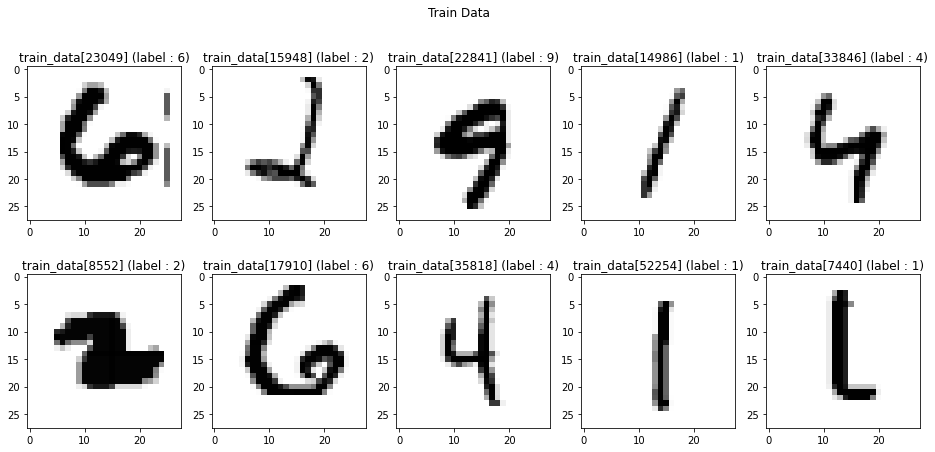

In [4]:
idx_show = np.arange(0, train_data.shape[0])
np.random.shuffle(idx_show)
idx_show = idx_show[0:10]
fig_train, ax_train = plt.subplots(2,5,figsize=(16, 7))
fig_train.suptitle("Train Data")
for idx in range(10):
    ax_train[idx//5][idx%5].imshow(train_data[idx_show[idx]],cmap="binary")
    ax_train[idx//5][idx%5].set_title("train_data[{}] (label : {})".format(idx_show[idx], train_labels[idx_show[idx]]))

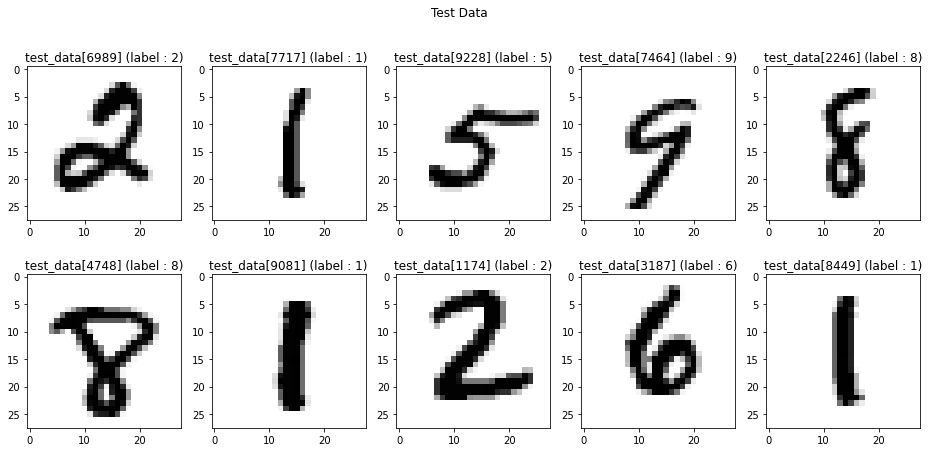

In [5]:
idx_show = np.arange(0, test_data.shape[0])
np.random.shuffle(idx_show)
idx_show = idx_show[0:10]
fig_test, ax_test = plt.subplots(2,5,figsize=(16, 7))
fig_test.suptitle("Test Data")
for idx in range(10):
    ax_test[idx//5][idx%5].imshow(test_data[idx_show[idx]],cmap="binary")
    ax_test[idx//5][idx%5].set_title("test_data[{}] (label : {})".format(idx_show[idx], test_labels[idx_show[idx]]))

> ### Load MNIST Data

In [6]:
batch_size = 100

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data = train_data.astype(np.float32)/255.0
test_data = test_data.astype(np.float32)/255.0

train_data = train_data.reshape((-1, 784))
test_data = test_data.reshape((-1, 784))
train_labels = train_labels.reshape((-1, 1))
test_labels = test_labels.reshape((-1, 1))

train_ds = tf.data.Dataset.from_tensor_slices((train_data, train_labels)).shuffle(10000).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((test_data, test_labels)).batch(batch_size)

>### Hypothesis, Cost, Optimizer


In [7]:
categories = 10

W = tf.Variable(tf.random.normal((784, categories), dtype=tf.float32))
B = tf.Variable(tf.random.normal((1, categories), dtype=tf.float32))

def logits(x):
  return tf.matmul(x, W) + B

def Hypothesis(x):
  return tf.nn.softmax(logits(x))

def Cost(logits, label):
  label_oh = tf.one_hot(label, categories)
  return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=label_oh))

>### Accuracy

In [8]:
def Accuracy(y_h, y):
    return np.mean(np.equal(np.argmax(y_h, axis=1).reshape((-1, 1)),y).astype(np.float32))

>### 결과 출력을 위한 함수

In [9]:
def Make_Result_Plot(suptitle, data, label, y_max):
    fig_result, ax_result = plt.subplots(2,5,figsize=(18, 7))
    fig_result.suptitle(suptitle)
    for idx in range(10):
        ax_result[idx//5][idx%5].imshow(data[idx].reshape((28,28)),cmap="binary")
        ax_result[idx//5][idx%5].set_title("test_data[{}] (label : {} / y : {})".format(idx, label[idx], y_max[idx]))

> ### Training 준비

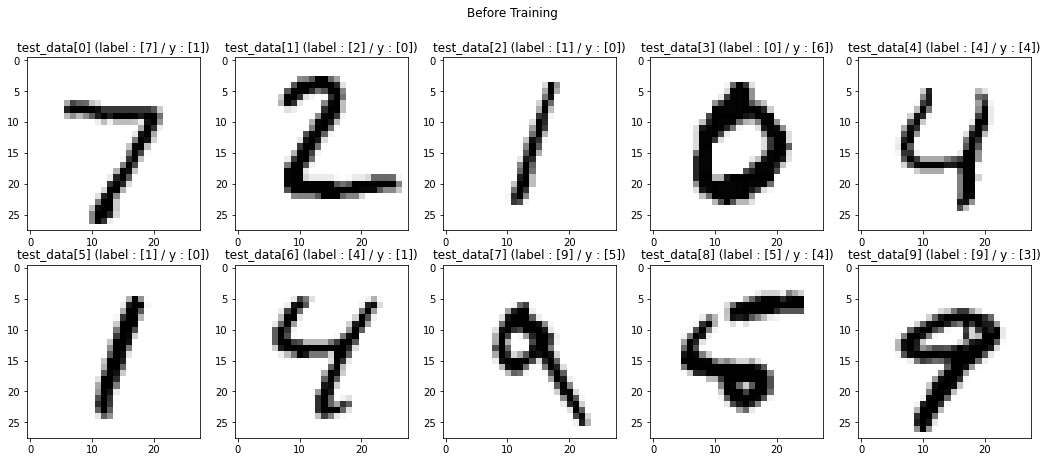

In [10]:
# 학습 (Training)
y_out = Hypothesis(test_data)

y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("Before Training", test_data, test_labels, y_max)

> ### 학습 (Training)

In [11]:
%%time

learning_rate = 0.1
epochs = 20
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
loss_fn = lambda: Cost(logits(batch_data), batch_labels)

n_disp = 20    # Training중에 몇번 accuracy 출력할지를 지정
training_idx = np.arange(0, n_disp+1, 1)
accu_graph = np.zeros(n_disp+1)

for cnt in range(0, epochs+1):
  if cnt%(epochs/n_disp) == 0:
    y_out = Hypothesis(test_data)
    accu_graph[(cnt//(epochs//n_disp))] = Accuracy(y_out, test_labels)
    print("[{:>5}] accuracy = {:>10.4}".format(cnt, accu_graph[(cnt//(epochs//n_disp))]))

  for batch_data, batch_labels in train_ds:
    optimizer.minimize(loss_fn, [W, B])

[    0] accuracy =     0.0636
[    1] accuracy =     0.7619
[    2] accuracy =     0.8199
[    3] accuracy =     0.8399
[    4] accuracy =     0.8546
[    5] accuracy =     0.8628
[    6] accuracy =      0.869
[    7] accuracy =     0.8721
[    8] accuracy =     0.8782
[    9] accuracy =     0.8813
[   10] accuracy =     0.8844
[   11] accuracy =     0.8871
[   12] accuracy =     0.8895
[   13] accuracy =     0.8893
[   14] accuracy =     0.8916
[   15] accuracy =     0.8934
[   16] accuracy =     0.8946
[   17] accuracy =     0.8946
[   18] accuracy =     0.8957
[   19] accuracy =     0.8961
[   20] accuracy =     0.8961
CPU times: user 52.8 s, sys: 6.12 s, total: 58.9 s
Wall time: 56 s


> ### Ploting : Cost/Training Count

(0.0, 1.1)

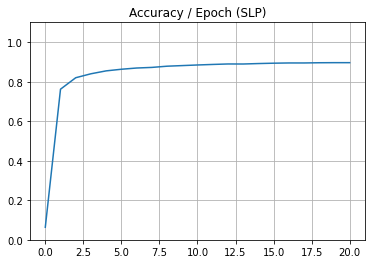

In [12]:
# Plot : Accuracy / Epoch
fig_accu, ax_accu = plt.subplots()
ax_accu.plot(training_idx, accu_graph)
ax_accu.set_title("Accuracy / Epoch (SLP)")
ax_accu.grid(True)
ax_accu.set_ylim(0,1.1)

> ### Training 이후

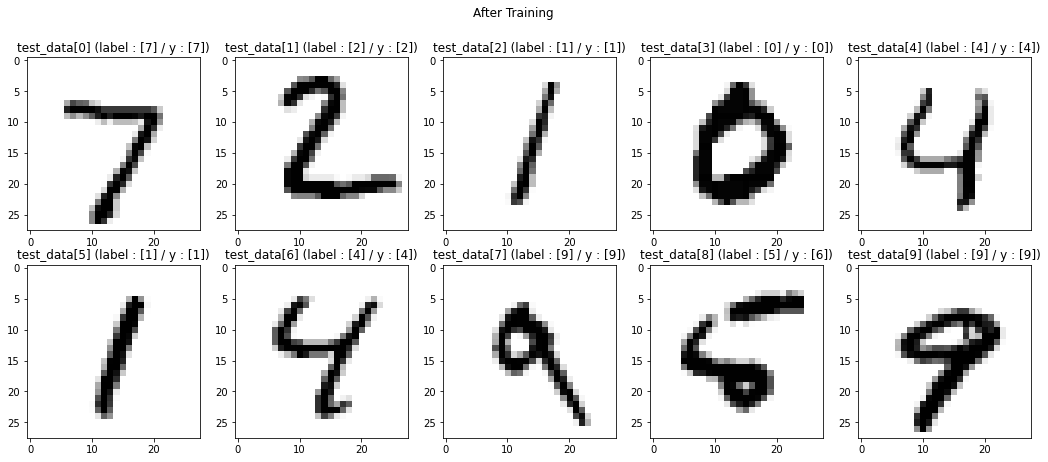

In [13]:
y_out = Hypothesis(test_data)
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("After Training", test_data, test_labels, y_max)